## Regression with Neural Network

 1. Prepare the data
 2. Build the model
 3. Set the criterion
 4. Train the model
 5. Visualize the result

### 1. Prepare the data

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import datasets

warnings.simplefilter('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target

df = pd.DataFrame([x_data, y_data]).T
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


---

### 2. Build the model

In [25]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64))
W3 = tf.Variable(tf.random_normal([10,50], dtype=tf.float64))
W4 = tf.Variable(tf.random_normal([50,8], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([8, 1], dtype=tf.float64))

## Activation Function
hidden1 = tf.nn.elu(tf.matmul(_x_data, W1)) 
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2)) 
hidden3 = tf.nn.elu(tf.matmul(hidden2, W3)) 
hidden4 = tf.nn.sigmoid(tf.matmul(hidden3, W4)) 


output = tf.matmul(hidden4, W_out)

---

### 3. Set the criterion: Cost function & Gradient Descent method

In [26]:
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

---

### 4. Train the model

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print(f"Step {step} || Loss {sess.run(loss)}")
            
    output = sess.run(output)

Step 0 || Loss 433.9218444824219
Step 5000 || Loss 84.64948272705078
Step 10000 || Loss 29.443687438964844
Step 15000 || Loss 25.986040115356445
Step 20000 || Loss 25.921987533569336
Step 25000 || Loss 25.067419052124023
Step 30000 || Loss 24.570714950561523
Step 35000 || Loss 24.340805053710938
Step 40000 || Loss 24.19255828857422
Step 45000 || Loss 23.911834716796875


---

### 5. Visualize the result

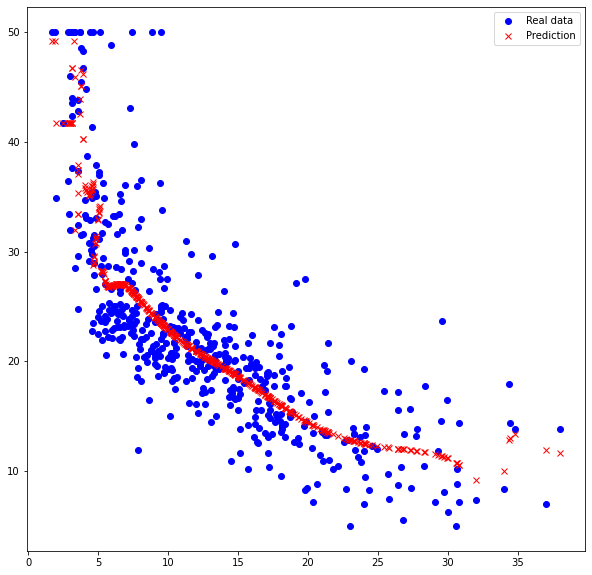

In [28]:
plt.figure(figsize=(10, 10))

plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'rx', label='Prediction')
plt.legend()

plt.show()